In [1]:
# Integration

import numpy as np

class Integrators:

    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.n = n
        self.f = f

        self.no_of_panels = n + 1
        self.total_no_of_points = n + 2

        self.dx = (self.b - self.a)/self.no_of_panels

        self.x = np.linspace(self.a, self.b, self.total_no_of_points)

        self.fx = self.f(self.x)

    def trapezoid(self):
        return (self.dx/2)*(self.fx[0] + self.fx[-1] + 2*np.sum(self.fx[1:-1]))

    def simpsons13(self):
        return (self.dx/3)*(self.fx[0] + self.fx[-1] + 4*np.sum(self.fx[1:-1:2]) + 2*np.sum(self.fx[2:-1:2]))

    def simpsons38(self):
        return (self.dx/2)*(self.fx[0] + self.fx[-1] + 3*np.sum(self.fx[1:-1:3]) + 3*np.sum(self.fx[2:-1:3]) + 2*np.sum(self.fx[3:-1:3]))

I = Integrators(0,np.pi,9,lambda x: np.sin(x))
print(I.trapezoid())
print(I.simpsons13())
print(I.simpsons38())

# finished in 05:57

1.9835235375094546
2.0001095173150043
2.650273329751086


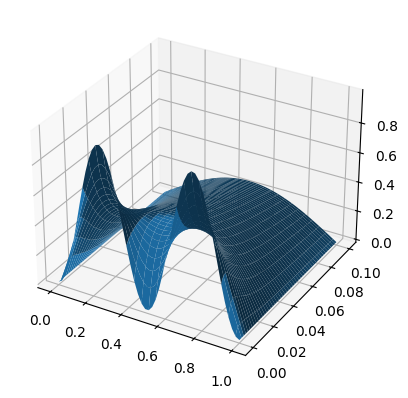

In [4]:
import numpy as np

class PDE_Heat:

    def __init__(self, a, b, nx, t_final, sigma, D, boundary_conds):
        self.a = a
        self.b = b
        self.nx = nx
        self.t_final = t_final
        self.sigma = sigma
        self.D = D
        self.boundary_conds = boundary_conds

        self.no_of_panels_x = nx + 1
        self.total_no_of_points_x = nx + 2

        self.dx = (self.b - self.a)/self.no_of_panels_x
        self.dt = (sigma/D)*self.dx**2

        self.x = np.linspace(self.a, self.b, self.total_no_of_points_x)
        self.t = np.arange(0, self.t_final, self.dt)

        self.total_no_of_points_t = len(self.t)
        
        self.x_t0, self.t_xa, self.t_xb = self.boundary_conds

    def createW(self):
        W = np.zeros((self.total_no_of_points_t, self.total_no_of_points_x))
        W[0,1:-1] = self.x_t0(self.x[1:-1])
        W[:,0] = self.t_xa(self.t)
        W[:,-1] = self.t_xb(self.t)

        return W

    def createForwardA(self):
        m = self.total_no_of_points_x
        A = np.zeros((m,m))

        j_ind_low = np.arange(0,m-2,1)
        i_ind = np.arange(1,m-1,1)
        j_ind_high = np.arange(2,m,1)

        A[0,0] = A[-1,-1] = 1
        A[i_ind, j_ind_low] = self.sigma
        A[i_ind, i_ind] = 1 - 2*self.sigma
        A[i_ind, j_ind_high] = self.sigma

        return A
        
    def createBackwardA(self):
        pass
    
    def forward(self):
        W = self.createW()
        A = self.createForwardA()

        for i in range(0, self.total_no_of_points_t - 1):
            W[i+1,:] = A@W[i,:]

        return W
    
    def backward(self):
        pass


import matplotlib.pyplot as plt

abc = PDE_Heat(0,1,50,0.1,1/3,1,[lambda x: np.square(np.sin(2*np.pi*x)), lambda x: 0, lambda x: 0])
xx,tt = np.meshgrid(abc.x, abc.t)

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(xx,tt,abc.forward())
plt.show()

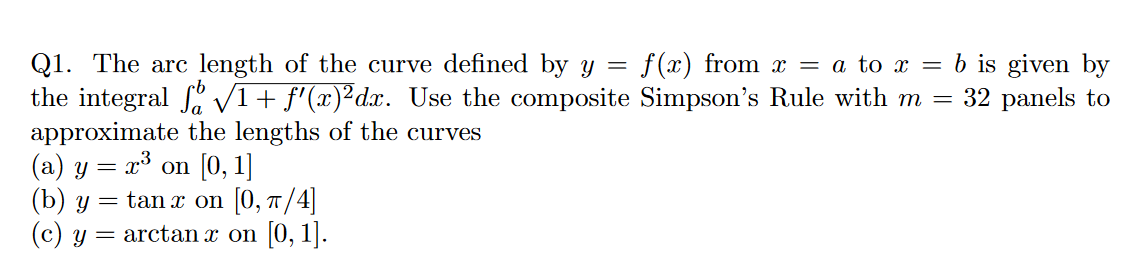

In [6]:
# Path length
# f(x) = x^3 on [0,1]
# g(x) = math.sqrt(1 + 9*x**4)

I = Integrators(0,1,31,lambda x: np.sqrt(1 + 9*x**4))
print(I.simpsons13())

1.5478656402246393
